In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import optuna.integration.lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
path_train = "./try1/train_processed.csv"

def load_data(path):
    df = pd.read_csv(path)
    return df

df_train = load_data(path_train)
df_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,mpg
0,4,135.0,84.0,2525.0,16.0,82,1,1,29.0
1,4,89.0,71.0,1925.0,14.0,79,2,2,31.9
2,6,156.0,108.0,2930.0,15.5,76,3,3,19.0
3,4,90.0,75.0,2125.0,14.5,74,1,1,28.0
4,4,89.0,62.0,2050.0,17.3,81,3,3,37.7


In [3]:
def split_Xy(df):
    X = df.drop("mpg", axis=1)
    y = df["mpg"]
    return X, y

X, y = split_Xy(df_train)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [5]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [6]:
params = {
          'task': 'train',              # タスクを訓練に設定
          'boosting_type': 'gbdt',      # GBDTを指定
          'objective': 'regression',    # 回帰を指定
          'metric': 'rmse',             # 回帰の評価関数
          'learning_rate': 0.3,         # 学習率
          }

In [7]:
model = lgb.train(
                  params=params,                    # ハイパーパラメータをセット
                  train_set=lgb_train,              # 訓練データを訓練用にセット
                  valid_sets=[lgb_train, lgb_val], # 訓練データとテストデータをセット
                  valid_names=['Train', 'Test'],    # データセットの名前をそれぞれ設定
                  num_boost_round=100,              # 計算回数
                  )  

[I 2023-09-27 19:12:18,879] A new study created in memory with name: no-name-c18bfa5e-959b-44f4-b8a5-dd54aea40aff
feature_fraction, val_score: inf:   0%|                                                                                                                | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	Train's rmse: 6.42658	Test's rmse: 6.43813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	Train's rmse: 5.12588	Test's rmse: 5.20995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	Train's rmse: 4.49386	Test's rmse: 4.46502
[LightGBM] [Warning] No further splits with positive ga

feature_fraction, val_score: 2.748331:  14%|##############1                                                                                    | 1/7 [00:02<00:12,  2.11s/it]

[98]	Train's rmse: 1.62954	Test's rmse: 2.73866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	Train's rmse: 6.20997	Test's rmse: 6.19003
[Lig

feature_fraction, val_score: 2.748331:  29%|############################2                                                                      | 2/7 [00:04<00:11,  2.28s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[84]	Train's rmse: 1.56316	Test's rmse: 2.85349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[85]	Train's rmse: 1.55792	Test's rmse: 2.85691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	Train's rmse: 1.55464	Test's rmse: 2.85836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[87]	Train's rmse: 1.54359	Test's rmse: 2.85556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[88]	Train's rmse: 1.53977	Test's rmse: 2.85402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	Train's rmse: 1.53431	Test's rmse: 2.85112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	Train's rmse: 1.53021	Test's rmse: 2.86217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	Train's rmse: 1.5242	Test's rmse: 2.87772
[LightGBM] [Warni

feature_fraction, val_score: 2.748331:  43%|##########################################4                                                        | 3/7 [00:06<00:09,  2.28s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.39511	Test's rmse: 3.08298
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.38998	Test's rmse: 3.08781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.38425	Test's rmse: 3.10074
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positiv

feature_fraction, val_score: 2.748331:  57%|########################################################5                                          | 4/7 [00:08<00:05,  1.88s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.34843	Test's rmse: 3.1101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.34342	Test's rmse: 3.11754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.33878	Test's rmse: 3.11401
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive

feature_fraction, val_score: 2.748331:  71%|######################################################################7                            | 5/7 [00:10<00:04,  2.12s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	Train's rmse: 1.33373	Test's rmse: 3.0892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	Train's rmse: 1.32959	Test's rmse: 3.09542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.32076	Test's rmse: 3.10207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.31394	Test's rmse: 3.09819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.30943	Test's rmse: 3.0886
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] 

feature_fraction, val_score: 2.748331:  86%|####################################################################################8              | 6/7 [00:14<00:02,  2.70s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	Train's rmse: 1.38014	Test's rmse: 3.09263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	Train's rmse: 1.37078	Test's rmse: 3.10316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	Train's rmse: 1.36582	Test's rmse: 3.10648
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	Train's rmse: 1.36029	Test's rmse: 3.1033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	Train's rmse: 1.35724	Test's rmse: 3.09717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	Train's rmse: 1.35304	Test's rmse: 3.10769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.34843	Test's rmse: 3.1101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.34342	Test's rmse: 3.11754
[LightGBM] [Warnin

feature_fraction, val_score: 2.748331: 100%|###################################################################################################| 7/7 [00:16<00:00,  2.39s/it]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.31122	Test's rmse: 3.02197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.30312	Test's rmse: 3.02303


num_leaves, val_score: 2.748331:   0%|                                                                                                                | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	Train's rmse: 6.42658	Test's rmse: 6.43813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	Train's rmse: 5.12588	Test's rmse: 5.20995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	Train's rmse: 4.49386	Test's rmse: 4.46502
[LightGBM] [Warning] No further splits with positive ga

num_leaves, val_score: 2.748331:   5%|#####2                                                                                                  | 1/20 [00:04<01:19,  4.17s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.62954	Test's rmse: 2.73866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positiv

num_leaves, val_score: 2.748331:  10%|##########4                                                                                             | 2/20 [00:07<01:03,  3.54s/it]

[82]	Train's rmse: 1.7109	Test's rmse: 2.76645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[83]	Train's rmse: 1.7075	Test's rmse: 2.76306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[84]	Train's rmse: 1.70138	Test's rmse: 2.76991
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[85]	Train's rmse: 1.69668	Test's rmse: 2.76575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[86]	Train's rmse: 1.69222	Test's rmse: 2.77443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[87]	Train's rmse: 1.68425	Test's rmse: 2.77768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[88]	Train's rmse: 1.67476	Test's rmse: 2.77214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	Train's rmse: 1.67278	Test's rmse: 2.77584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	Train's rmse:

num_leaves, val_score: 2.748331:  15%|###############6                                                                                        | 3/20 [00:09<00:47,  2.78s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	Train's rmse: 1.67278	Test's rmse: 2.77584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	Train's rmse: 1.66357	Test's rmse: 2.75161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	Train's rmse: 1.66189	Test's rmse: 2.75223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	Train's rmse: 1.66009	Test's rmse: 2.75334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	Train's rmse: 1.6574	Test's rmse: 2.75706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	Train's rmse: 1.65097	Test's rmse: 2.75281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	Train's rmse: 1.64551	Test's rmse: 2.74966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	Train's rmse: 1.64174	Test's rmse: 2.75379
[LightGBM] [Warni

num_leaves, val_score: 2.748331:  20%|####################8                                                                                   | 4/20 [00:10<00:32,  2.05s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[46]	Train's rmse: 1.96733	Test's rmse: 2.75714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[47]	Train's rmse: 1.95908	Test's rmse: 2.74776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[48]	Train's rmse: 1.94572	Test's rmse: 2.72758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[49]	Train's rmse: 1.93869	Test's rmse: 2.72916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	Train's rmse: 1.92809	Test's rmse: 2.72296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	Train's rmse: 1.92547	Test's rmse: 2.72206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	Train's rmse: 1.91751	Test's rmse: 2.7103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	Train's rmse: 1.90987	Test's rmse: 2.70917
[LightGBM] [Warni

num_leaves, val_score: 2.748331:  25%|##########################                                                                              | 5/20 [00:14<00:43,  2.89s/it]

[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	Train's rmse: 6.42658	Test's rmse: 6.43813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	Train's rmse: 5.12588	Test's rmse: 5.20995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	Train's rmse: 4.49386	Test's rmse: 4.46502
[Light

num_leaves, val_score: 2.748331:  30%|###############################2                                                                        | 6/20 [00:15<00:32,  2.35s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.62954	Test's rmse: 2.73866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.51101	Test's rmse: 6.42766
[2]	

num_leaves, val_score: 2.643116:  35%|####################################4                                                                   | 7/20 [00:17<00:26,  2.06s/it]

[60]	Train's rmse: 2.23437	Test's rmse: 2.59582
[61]	Train's rmse: 2.23017	Test's rmse: 2.59409
[62]	Train's rmse: 2.22634	Test's rmse: 2.6028
[63]	Train's rmse: 2.22191	Test's rmse: 2.59671
[64]	Train's rmse: 2.21533	Test's rmse: 2.61011
[65]	Train's rmse: 2.2049	Test's rmse: 2.60542
[66]	Train's rmse: 2.20179	Test's rmse: 2.61312
[67]	Train's rmse: 2.20015	Test's rmse: 2.61432
[68]	Train's rmse: 2.19742	Test's rmse: 2.6119
[69]	Train's rmse: 2.19317	Test's rmse: 2.61995
[70]	Train's rmse: 2.17457	Test's rmse: 2.61797
[71]	Train's rmse: 2.16965	Test's rmse: 2.6186
[72]	Train's rmse: 2.16577	Test's rmse: 2.62459
[73]	Train's rmse: 2.16285	Test's rmse: 2.62865
[74]	Train's rmse: 2.15155	Test's rmse: 2.63011
[75]	Train's rmse: 2.14801	Test's rmse: 2.64792
[76]	Train's rmse: 2.14483	Test's rmse: 2.64373
[77]	Train's rmse: 2.14079	Test's rmse: 2.63064
[78]	Train's rmse: 2.13732	Test's rmse: 2.63203
[79]	Train's rmse: 2.12956	Test's rmse: 2.64182
[80]	Train's rmse: 2.12665	Test's rmse: 2.63

num_leaves, val_score: 2.643116:  40%|#########################################6                                                              | 8/20 [00:18<00:23,  1.97s/it]

[68]	Train's rmse: 1.80194	Test's rmse: 2.70938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	Train's rmse: 1.79503	Test's rmse: 2.70799
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	Train's rmse: 1.78787	Test's rmse: 2.72521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	Train's rmse: 1.78049	Test's rmse: 2.7261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	Train's rmse: 1.77465	Test's rmse: 2.73886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	Train's rmse: 1.76524	Test's rmse: 2.75473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	Train's rmse: 1.76048	Test's rmse: 2.75567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	Train's rmse: 1.75185	Test's rmse: 2.76358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	Train's rmse

num_leaves, val_score: 2.643116:  45%|##############################################8                                                         | 9/20 [00:22<00:28,  2.56s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	Train's rmse: 1.65097	Test's rmse: 2.75281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	Train's rmse: 1.64551	Test's rmse: 2.74966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	Train's rmse: 1.64174	Test's rmse: 2.75379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	Train's rmse: 1.63444	Test's rmse: 2.74767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.62954	Test's rmse: 2.73866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, 

num_leaves, val_score: 2.643116:  50%|###################################################5                                                   | 10/20 [00:26<00:27,  2.75s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	Train's rmse: 1.66009	Test's rmse: 2.75334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	Train's rmse: 1.6574	Test's rmse: 2.75706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	Train's rmse: 1.65097	Test's rmse: 2.75281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	Train's rmse: 1.64551	Test's rmse: 2.74966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	Train's rmse: 1.64174	Test's rmse: 2.75379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	Train's rmse: 1.63444	Test's rmse: 2.74767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.62954	Test's rmse: 2.73866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warni

num_leaves, val_score: 2.643116:  55%|########################################################6                                              | 11/20 [00:31<00:31,  3.49s/it]

[98]	Train's rmse: 1.62954	Test's rmse: 2.73866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	Train's rmse: 6.42658	Test's rmse: 6.43813
[Lig

num_leaves, val_score: 2.643116:  60%|#############################################################8                                         | 12/20 [00:32<00:23,  2.95s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	Train's rmse: 1.78787	Test's rmse: 2.72521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	Train's rmse: 1.78049	Test's rmse: 2.7261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	Train's rmse: 1.77465	Test's rmse: 2.73886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	Train's rmse: 1.76524	Test's rmse: 2.75473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	Train's rmse: 1.76048	Test's rmse: 2.75567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	Train's rmse: 1.75185	Test's rmse: 2.76358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	Train's rmse: 1.74781	Test's rmse: 2.76977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	Train's rmse: 1.74346	Test's rmse: 2.7688
[LightGBM] [Warnin

num_leaves, val_score: 2.643116:  65%|##################################################################9                                    | 13/20 [00:35<00:19,  2.85s/it]

[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	Train's rmse: 6.42658	Test's rmse: 6.43813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	Train's rmse: 5.12588	Test's rmse: 5.20995
[Ligh

num_leaves, val_score: 2.643116:  70%|########################################################################1                              | 14/20 [00:35<00:12,  2.09s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	Train's rmse: 1.92547	Test's rmse: 2.72206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	Train's rmse: 1.91751	Test's rmse: 2.7103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	Train's rmse: 1.90987	Test's rmse: 2.70917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	Train's rmse: 1.90447	Test's rmse: 2.71314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	Train's rmse: 1.89431	Test's rmse: 2.6952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	Train's rmse: 1.88855	Test's rmse: 2.69668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	Train's rmse: 1.88344	Test's rmse: 2.69851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	Train's rmse: 1.87869	Test's rmse: 2.69224
[LightGBM] [Warnin

num_leaves, val_score: 2.643116:  75%|#############################################################################2                         | 15/20 [00:38<00:10,  2.12s/it]

[98]	Train's rmse: 1.62954	Test's rmse: 2.73866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	Train's rmse: 6.42658	Test's rmse: 6.43813
[Lig

num_leaves, val_score: 2.643116:  80%|##################################################################################4                    | 16/20 [00:42<00:11,  2.77s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.42658	Test's rmse: 6.43813
[2]	Train's rmse: 5.12588	Test's rmse: 5.20995
[3]	Train's rmse: 4.50476	Test's rmse: 4.47231
[4]	Train's rmse: 3.78535	Test's rmse: 3.65572
[5]	Train's rmse: 3.46314	Test's rmse: 3.30195
[6]	Train's rmse: 3.30564	Test's rmse: 3.13645
[7]	Train's rms

num_leaves, val_score: 2.643116:  85%|#######################################################################################5               | 17/20 [00:44<00:07,  2.59s/it]

[68]	Train's rmse: 1.84372	Test's rmse: 2.77125
[69]	Train's rmse: 1.83713	Test's rmse: 2.77848
[70]	Train's rmse: 1.82962	Test's rmse: 2.80732
[71]	Train's rmse: 1.81834	Test's rmse: 2.81118
[72]	Train's rmse: 1.81223	Test's rmse: 2.81101
[73]	Train's rmse: 1.80688	Test's rmse: 2.80605
[74]	Train's rmse: 1.80256	Test's rmse: 2.80098
[75]	Train's rmse: 1.79461	Test's rmse: 2.79394
[76]	Train's rmse: 1.787	Test's rmse: 2.79787
[77]	Train's rmse: 1.77796	Test's rmse: 2.80792
[78]	Train's rmse: 1.76797	Test's rmse: 2.80487
[79]	Train's rmse: 1.75888	Test's rmse: 2.7896
[80]	Train's rmse: 1.75105	Test's rmse: 2.79244
[81]	Train's rmse: 1.74983	Test's rmse: 2.79432
[82]	Train's rmse: 1.74242	Test's rmse: 2.81162
[83]	Train's rmse: 1.73723	Test's rmse: 2.81634
[84]	Train's rmse: 1.73186	Test's rmse: 2.81821
[85]	Train's rmse: 1.72466	Test's rmse: 2.83286
[86]	Train's rmse: 1.72029	Test's rmse: 2.82503
[87]	Train's rmse: 1.71496	Test's rmse: 2.82713
[88]	Train's rmse: 1.70606	Test's rmse: 2.8

num_leaves, val_score: 2.643116:  90%|############################################################################################7          | 18/20 [00:49<00:06,  3.17s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	Train's rmse: 1.64551	Test's rmse: 2.74966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	Train's rmse: 1.64174	Test's rmse: 2.75379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	Train's rmse: 1.63444	Test's rmse: 2.74767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	Train's rmse: 1.62954	Test's rmse: 2.73866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	Train's rmse: 1.62762	Test's rmse: 2.73678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	Train's rmse: 1.62274	Test's rmse: 2.74833
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] T

num_leaves, val_score: 2.643116:  95%|#################################################################################################8     | 19/20 [00:50<00:02,  2.59s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	Train's rmse: 1.92809	Test's rmse: 2.72296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[51]	Train's rmse: 1.92547	Test's rmse: 2.72206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	Train's rmse: 1.91751	Test's rmse: 2.7103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[53]	Train's rmse: 1.90987	Test's rmse: 2.70917
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[54]	Train's rmse: 1.90447	Test's rmse: 2.71314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[55]	Train's rmse: 1.89431	Test's rmse: 2.6952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[56]	Train's rmse: 1.88855	Test's rmse: 2.69668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	Train's rmse: 1.88344	Test's rmse: 2.69851
[LightGBM] [Warnin

num_leaves, val_score: 2.643116: 100%|#######################################################################################################| 20/20 [00:51<00:00,  2.56s/it]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[87]	Train's rmse: 1.68425	Test's rmse: 2.77768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[88]	Train's rmse: 1.67476	Test's rmse: 2.77214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	Train's rmse: 1.67278	Test's rmse: 2.77584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	Train's rmse: 1.66357	Test's rmse: 2.75161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[91]	Train's rmse: 1.66189	Test's rmse: 2.75223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	Train's rmse: 1.66009	Test's rmse: 2.75334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[93]	Train's rmse: 1.6574	Test's rmse: 2.75706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	Train's rmse: 1.65097	Test's rmse: 2.75281
[LightGBM] [Warni

bagging, val_score: 2.643116:   0%|                                                                                                                   | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.62308	Test's rmse: 6.5762
[2]	Train's rmse: 5.50447	Test's rmse: 5.44662
[3]	Train's rmse: 4.83313	Test's rmse: 4.68022
[4]	Train's rmse: 4.30807	Test's rmse: 4.07297
[5]	Train's rmse: 3.98811	Test's rmse: 3.76411
[6]	Train's rmse: 3.81958	Test's rmse: 3.51793
[7]	Train's rmse: 3.63089	Test's rmse: 3.37251
[8]	Train's rmse: 3.3137	Test's rmse: 3.0611
[9]	Train's rmse: 3.28401	Test's rmse: 3.1217
[1

bagging, val_score: 2.643116:  10%|##########7                                                                                                | 1/10 [00:00<00:04,  1.84it/s]

[13]	Train's rmse: 3.01173	Test's rmse: 2.8996
[14]	Train's rmse: 2.99015	Test's rmse: 2.90903
[15]	Train's rmse: 2.97619	Test's rmse: 2.92397
[16]	Train's rmse: 2.96845	Test's rmse: 2.94096
[17]	Train's rmse: 2.95566	Test's rmse: 2.93003
[18]	Train's rmse: 2.86431	Test's rmse: 2.85705
[19]	Train's rmse: 2.83519	Test's rmse: 2.83317
[20]	Train's rmse: 2.79604	Test's rmse: 2.79568
[21]	Train's rmse: 2.77786	Test's rmse: 2.79558
[22]	Train's rmse: 2.74814	Test's rmse: 2.79005
[23]	Train's rmse: 2.74199	Test's rmse: 2.78274
[24]	Train's rmse: 2.72349	Test's rmse: 2.77854
[25]	Train's rmse: 2.72027	Test's rmse: 2.7889
[26]	Train's rmse: 2.71896	Test's rmse: 2.78978
[27]	Train's rmse: 2.71346	Test's rmse: 2.78252
[28]	Train's rmse: 2.69273	Test's rmse: 2.79151
[29]	Train's rmse: 2.67321	Test's rmse: 2.83778
[30]	Train's rmse: 2.65988	Test's rmse: 2.80028
[31]	Train's rmse: 2.64857	Test's rmse: 2.81826
[32]	Train's rmse: 2.6404	Test's rmse: 2.79254
[33]	Train's rmse: 2.63543	Test's rmse: 2.7

bagging, val_score: 2.589521:  20%|#####################4                                                                                     | 2/10 [00:01<00:08,  1.01s/it]

[99]	Train's rmse: 2.04711	Test's rmse: 2.59221
[100]	Train's rmse: 2.04235	Test's rmse: 2.58952
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.51396	Test's rmse: 6.43087
[2]	Train's rmse: 5.3438	Test's rmse: 5.29719
[3]	Train's rmse: 4.6945	Test's rmse: 4.55601
[4]	Train's rmse: 4.09873	Test's rmse: 3.84412
[5]	Train's rmse: 3.72387	Test's rmse: 3.42993
[6]	Train's rmse: 3.49381	Test's rmse: 3.17999
[7]	Train's rmse: 3.31979	Test's rmse: 3.019

bagging, val_score: 2.589521:  30%|################################1                                                                          | 3/10 [00:04<00:12,  1.73s/it]

[69]	Train's rmse: 2.17724	Test's rmse: 2.61022
[70]	Train's rmse: 2.16143	Test's rmse: 2.58635
[71]	Train's rmse: 2.15333	Test's rmse: 2.59035
[72]	Train's rmse: 2.14711	Test's rmse: 2.60089
[73]	Train's rmse: 2.14358	Test's rmse: 2.60622
[74]	Train's rmse: 2.13271	Test's rmse: 2.6107
[75]	Train's rmse: 2.12861	Test's rmse: 2.61548
[76]	Train's rmse: 2.12395	Test's rmse: 2.62586
[77]	Train's rmse: 2.10995	Test's rmse: 2.63043
[78]	Train's rmse: 2.10587	Test's rmse: 2.64279
[79]	Train's rmse: 2.09917	Test's rmse: 2.65029
[80]	Train's rmse: 2.09556	Test's rmse: 2.64577
[81]	Train's rmse: 2.09347	Test's rmse: 2.64962
[82]	Train's rmse: 2.08951	Test's rmse: 2.64389
[83]	Train's rmse: 2.08725	Test's rmse: 2.65526
[84]	Train's rmse: 2.08319	Test's rmse: 2.65801
[85]	Train's rmse: 2.079	Test's rmse: 2.6694
[86]	Train's rmse: 2.07577	Test's rmse: 2.66327
[87]	Train's rmse: 2.07309	Test's rmse: 2.66764
[88]	Train's rmse: 2.07023	Test's rmse: 2.66408
[89]	Train's rmse: 2.06709	Test's rmse: 2.66

bagging, val_score: 2.589521:  50%|#####################################################5                                                     | 5/10 [00:05<00:04,  1.03it/s]

[94]	Train's rmse: 2.07123	Test's rmse: 2.64301
[95]	Train's rmse: 2.06784	Test's rmse: 2.6377
[96]	Train's rmse: 2.06474	Test's rmse: 2.63236
[97]	Train's rmse: 2.06252	Test's rmse: 2.63673
[98]	Train's rmse: 2.06036	Test's rmse: 2.63764
[99]	Train's rmse: 2.05887	Test's rmse: 2.63986
[100]	Train's rmse: 2.05348	Test's rmse: 2.64312
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.51396	Test's rmse: 6.43087
[2]	Train's rmse: 5.3438	Test's rmse: 

bagging, val_score: 2.589521:  60%|################################################################2                                          | 6/10 [00:07<00:05,  1.31s/it]

[94]	Train's rmse: 2.05228	Test's rmse: 2.64574
[95]	Train's rmse: 2.04861	Test's rmse: 2.64925
[96]	Train's rmse: 2.044	Test's rmse: 2.63971
[97]	Train's rmse: 2.04208	Test's rmse: 2.65274
[98]	Train's rmse: 2.03975	Test's rmse: 2.65043
[99]	Train's rmse: 2.03861	Test's rmse: 2.6545
[100]	Train's rmse: 2.03563	Test's rmse: 2.6574
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.51396	Test's rmse: 6.43087
[2]	Train's rmse: 5.3438	Test's rmse: 5.2

bagging, val_score: 2.589521:  80%|#####################################################################################6                     | 8/10 [00:11<00:02,  1.44s/it]

[95]	Train's rmse: 2.04861	Test's rmse: 2.64925
[96]	Train's rmse: 2.044	Test's rmse: 2.63971
[97]	Train's rmse: 2.04208	Test's rmse: 2.65274
[98]	Train's rmse: 2.03975	Test's rmse: 2.65043
[99]	Train's rmse: 2.03861	Test's rmse: 2.6545
[100]	Train's rmse: 2.03563	Test's rmse: 2.6574
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.50975	Test's rmse: 6.42296
[2]	Train's rmse: 5.47733	Test's rmse: 5.40641
[3]	Train's rmse: 4.81416	Test's rmse: 4.5

bagging, val_score: 2.589521:  90%|################################################################################################3          | 9/10 [00:11<00:01,  1.03s/it]

[24]	Train's rmse: 2.94161	Test's rmse: 3.11228
[25]	Train's rmse: 2.94963	Test's rmse: 3.14367
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[26]	Train's rmse: 2.92526	Test's rmse: 3.10418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[27]	Train's rmse: 2.91314	Test's rmse: 3.10603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[28]	Train's rmse: 2.91329	Test's rmse: 3.08717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[29]	Train's rmse: 2.93065	Test's rmse: 3.10408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	Train's rmse: 2.9471	Test's rmse: 3.10711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[31]	Train's rmse: 2.90336	Test's rmse: 3.07744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[32]	Train's rmse: 2.88956	Test's rmse: 3.07124
[LightGBM] [Warning] No further splits with 

bagging, val_score: 2.589521: 100%|##########################################################################################################| 10/10 [00:12<00:00,  1.28s/it]


[98]	Train's rmse: 2.08187	Test's rmse: 2.74524
[99]	Train's rmse: 2.08049	Test's rmse: 2.75455
[100]	Train's rmse: 2.07971	Test's rmse: 2.76955


feature_fraction_stage2, val_score: 2.589521:   0%|                                                                                                    | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.48896	Test's rmse: 6.39937
[2]	Train's rmse: 5.41004	Test's rmse: 5.41511
[3]	Train's rmse: 4.74803	Test's rmse: 4.60301
[4]	Train's rmse: 4.15008	Test's rmse: 3.87256
[5]	Train's rmse: 3.77001	Test's rmse: 3.46642
[6]	Train's rmse: 3.56151	Test's rmse: 3.1756
[7]	Train's rmse: 3.38459	Test's rmse: 2.97806
[8]	Train's rmse: 3.11056	Test's rmse: 2.73358
[9]	Train's rmse: 3.03053	Test's rmse: 2.65647

feature_fraction_stage2, val_score: 2.589521:  33%|##############################6                                                             | 1/3 [00:00<00:00,  2.65it/s]

[98]	Train's rmse: 2.05057	Test's rmse: 2.59314
[99]	Train's rmse: 2.04711	Test's rmse: 2.59221
[100]	Train's rmse: 2.04235	Test's rmse: 2.58952
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.45166	Test's rmse: 6.3946
[2]	Train's rmse: 5.61508	Test's rmse: 5.38322
[3]	Train's rmse: 4.99084	Test's rmse: 4.94212
[4]	Train's rmse: 4.25834	Test's rmse: 4.25947
[5]	Train's rmse: 3.9496	Test's rmse: 3.97879
[6]	Train's rmse: 3.51398	Test's rmse: 3.41

feature_fraction_stage2, val_score: 2.589521:  67%|#############################################################3                              | 2/3 [00:01<00:00,  1.17it/s]

[75]	Train's rmse: 2.16367	Test's rmse: 2.70454
[76]	Train's rmse: 2.15981	Test's rmse: 2.72024
[77]	Train's rmse: 2.15808	Test's rmse: 2.72594
[78]	Train's rmse: 2.15401	Test's rmse: 2.72814
[79]	Train's rmse: 2.14767	Test's rmse: 2.74381
[80]	Train's rmse: 2.14252	Test's rmse: 2.7361
[81]	Train's rmse: 2.1389	Test's rmse: 2.71927
[82]	Train's rmse: 2.12561	Test's rmse: 2.69402
[83]	Train's rmse: 2.11941	Test's rmse: 2.68477
[84]	Train's rmse: 2.10752	Test's rmse: 2.67541
[85]	Train's rmse: 2.10227	Test's rmse: 2.66603
[86]	Train's rmse: 2.09588	Test's rmse: 2.66357
[87]	Train's rmse: 2.08573	Test's rmse: 2.67577
[88]	Train's rmse: 2.07989	Test's rmse: 2.67354
[89]	Train's rmse: 2.07672	Test's rmse: 2.69474
[90]	Train's rmse: 2.07352	Test's rmse: 2.70618
[91]	Train's rmse: 2.0646	Test's rmse: 2.71357
[92]	Train's rmse: 2.06078	Test's rmse: 2.71232
[93]	Train's rmse: 2.05744	Test's rmse: 2.71466
[94]	Train's rmse: 2.05399	Test's rmse: 2.72829
[95]	Train's rmse: 2.04975	Test's rmse: 2.7

feature_fraction_stage2, val_score: 2.589521: 100%|############################################################################################| 3/3 [00:03<00:00,  1.02s/it]


[42]	Train's rmse: 2.37984	Test's rmse: 2.76815
[43]	Train's rmse: 2.37244	Test's rmse: 2.76692
[44]	Train's rmse: 2.36173	Test's rmse: 2.74379
[45]	Train's rmse: 2.3551	Test's rmse: 2.7493
[46]	Train's rmse: 2.34505	Test's rmse: 2.74493
[47]	Train's rmse: 2.34182	Test's rmse: 2.75087
[48]	Train's rmse: 2.33471	Test's rmse: 2.76466
[49]	Train's rmse: 2.32953	Test's rmse: 2.7493
[50]	Train's rmse: 2.32112	Test's rmse: 2.74655
[51]	Train's rmse: 2.31426	Test's rmse: 2.73656
[52]	Train's rmse: 2.29891	Test's rmse: 2.7114
[53]	Train's rmse: 2.29452	Test's rmse: 2.72312
[54]	Train's rmse: 2.28475	Test's rmse: 2.72556
[55]	Train's rmse: 2.28067	Test's rmse: 2.73715
[56]	Train's rmse: 2.26521	Test's rmse: 2.69545
[57]	Train's rmse: 2.2619	Test's rmse: 2.69569
[58]	Train's rmse: 2.25657	Test's rmse: 2.67656
[59]	Train's rmse: 2.24638	Test's rmse: 2.66095
[60]	Train's rmse: 2.24207	Test's rmse: 2.65418
[61]	Train's rmse: 2.23825	Test's rmse: 2.64879
[62]	Train's rmse: 2.23686	Test's rmse: 2.650

regularization_factors, val_score: 2.589521:   0%|                                                                                                    | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.49691	Test's rmse: 6.40862
[2]	Train's rmse: 5.42242	Test's rmse: 5.42767
[3]	Train's rmse: 4.76093	Test's rmse: 4.61652
[4]	Train's rmse: 4.16523	Test's rmse: 3.88962
[5]	Train's rmse: 3.78356	Test's rmse: 3.48186
[6]	Train's rmse: 3.57219	Test's rmse: 3.18809
[7]	Train's rmse: 3.39352	Test's rmse: 2.98884
[8]	Train's rmse: 3.11797	Test's rmse: 2.74253
[9]	Train's rmse: 3.03722	Test's rmse: 2.6641

regularization_factors, val_score: 2.560747:   5%|####6                                                                                       | 1/20 [00:03<00:58,  3.07s/it]

[78]	Train's rmse: 2.16209	Test's rmse: 2.55982
[79]	Train's rmse: 2.15361	Test's rmse: 2.55615
[80]	Train's rmse: 2.14892	Test's rmse: 2.54841
[81]	Train's rmse: 2.14651	Test's rmse: 2.5494
[82]	Train's rmse: 2.14027	Test's rmse: 2.56142
[83]	Train's rmse: 2.13417	Test's rmse: 2.55226
[84]	Train's rmse: 2.1312	Test's rmse: 2.54118
[85]	Train's rmse: 2.12495	Test's rmse: 2.51432
[86]	Train's rmse: 2.11929	Test's rmse: 2.51389
[87]	Train's rmse: 2.11793	Test's rmse: 2.51636
[88]	Train's rmse: 2.11629	Test's rmse: 2.51633
[89]	Train's rmse: 2.11357	Test's rmse: 2.51851
[90]	Train's rmse: 2.10855	Test's rmse: 2.52753
[91]	Train's rmse: 2.10693	Test's rmse: 2.52853
[92]	Train's rmse: 2.10277	Test's rmse: 2.53957
[93]	Train's rmse: 2.09485	Test's rmse: 2.54492
[94]	Train's rmse: 2.09139	Test's rmse: 2.55153
[95]	Train's rmse: 2.08954	Test's rmse: 2.55303
[96]	Train's rmse: 2.08615	Test's rmse: 2.55097
[97]	Train's rmse: 2.08299	Test's rmse: 2.5683
[98]	Train's rmse: 2.0779	Test's rmse: 2.57

regularization_factors, val_score: 2.522283:  10%|#########2                                                                                  | 2/20 [00:06<00:56,  3.12s/it]

[78]	Train's rmse: 2.141	Test's rmse: 2.5263
[79]	Train's rmse: 2.13657	Test's rmse: 2.51157
[80]	Train's rmse: 2.13494	Test's rmse: 2.51052
[81]	Train's rmse: 2.13289	Test's rmse: 2.51145
[82]	Train's rmse: 2.12585	Test's rmse: 2.52006
[83]	Train's rmse: 2.12016	Test's rmse: 2.51206
[84]	Train's rmse: 2.11556	Test's rmse: 2.51919
[85]	Train's rmse: 2.10962	Test's rmse: 2.49772
[86]	Train's rmse: 2.10481	Test's rmse: 2.49757
[87]	Train's rmse: 2.10455	Test's rmse: 2.49929
[88]	Train's rmse: 2.10165	Test's rmse: 2.50113
[89]	Train's rmse: 2.09824	Test's rmse: 2.49941
[90]	Train's rmse: 2.09606	Test's rmse: 2.50022
[91]	Train's rmse: 2.09416	Test's rmse: 2.49938
[92]	Train's rmse: 2.08955	Test's rmse: 2.50779
[93]	Train's rmse: 2.08481	Test's rmse: 2.52238
[94]	Train's rmse: 2.08089	Test's rmse: 2.52714
[95]	Train's rmse: 2.07784	Test's rmse: 2.53119
[96]	Train's rmse: 2.07348	Test's rmse: 2.54598
[97]	Train's rmse: 2.06952	Test's rmse: 2.54945
[98]	Train's rmse: 2.06648	Test's rmse: 2.5

regularization_factors, val_score: 2.517666:  15%|#############8                                                                              | 3/20 [00:07<00:36,  2.13s/it]

[19]	Train's rmse: 2.62526	Test's rmse: 2.51912
[20]	Train's rmse: 2.59524	Test's rmse: 2.52128
[21]	Train's rmse: 2.56804	Test's rmse: 2.51794
[22]	Train's rmse: 2.54373	Test's rmse: 2.50878
[23]	Train's rmse: 2.53244	Test's rmse: 2.50011
[24]	Train's rmse: 2.52243	Test's rmse: 2.48048
[25]	Train's rmse: 2.51897	Test's rmse: 2.47652
[26]	Train's rmse: 2.51031	Test's rmse: 2.45488
[27]	Train's rmse: 2.49793	Test's rmse: 2.45501
[28]	Train's rmse: 2.49053	Test's rmse: 2.44455
[29]	Train's rmse: 2.47519	Test's rmse: 2.46578
[30]	Train's rmse: 2.4649	Test's rmse: 2.45677
[31]	Train's rmse: 2.45462	Test's rmse: 2.46542
[32]	Train's rmse: 2.44537	Test's rmse: 2.48987
[33]	Train's rmse: 2.43852	Test's rmse: 2.47813
[34]	Train's rmse: 2.43262	Test's rmse: 2.48819
[35]	Train's rmse: 2.42456	Test's rmse: 2.4882
[36]	Train's rmse: 2.41882	Test's rmse: 2.47651
[37]	Train's rmse: 2.40996	Test's rmse: 2.47188
[38]	Train's rmse: 2.39938	Test's rmse: 2.47655
[39]	Train's rmse: 2.39675	Test's rmse: 2.

regularization_factors, val_score: 2.496797:  20%|##################4                                                                         | 4/20 [00:09<00:32,  2.06s/it]

[99]	Train's rmse: 2.07242	Test's rmse: 2.48605
[100]	Train's rmse: 2.06818	Test's rmse: 2.4968
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.515	Test's rmse: 6.42969
[2]	Train's rmse: 5.45077	Test's rmse: 5.45647
[3]	Train's rmse: 4.79072	Test's rmse: 4.64784
[4]	Train's rmse: 4.20034	Test's rmse: 3.92912
[5]	Train's rmse: 3.81532	Test's rmse: 3.51804
[6]	Train's rmse: 3.59752	Test's rmse: 3.21779
[7]	Train's rmse: 3.41486	Test's rmse: 3.0145

regularization_factors, val_score: 2.496797:  25%|#######################                                                                     | 5/20 [00:11<00:34,  2.29s/it]

[97]	Train's rmse: 2.09972	Test's rmse: 2.51231
[98]	Train's rmse: 2.09662	Test's rmse: 2.50648
[99]	Train's rmse: 2.09376	Test's rmse: 2.50893
[100]	Train's rmse: 2.08933	Test's rmse: 2.51555
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.51613	Test's rmse: 6.43099
[2]	Train's rmse: 5.45251	Test's rmse: 5.45821
[3]	Train's rmse: 4.79249	Test's rmse: 4.64958
[4]	Train's rmse: 4.20229	Test's rmse: 3.93133
[5]	Train's rmse: 3.81694	Test's rmse: 3

regularization_factors, val_score: 2.496797:  30%|###########################6                                                                | 6/20 [00:14<00:33,  2.38s/it]

[67]	Train's rmse: 2.23256	Test's rmse: 2.45734
[68]	Train's rmse: 2.2292	Test's rmse: 2.4749
[69]	Train's rmse: 2.22319	Test's rmse: 2.49807
[70]	Train's rmse: 2.21973	Test's rmse: 2.50367
[71]	Train's rmse: 2.21733	Test's rmse: 2.49644
[72]	Train's rmse: 2.21156	Test's rmse: 2.48313
[73]	Train's rmse: 2.20665	Test's rmse: 2.50525
[74]	Train's rmse: 2.20222	Test's rmse: 2.5076
[75]	Train's rmse: 2.20071	Test's rmse: 2.5107
[76]	Train's rmse: 2.1989	Test's rmse: 2.51083
[77]	Train's rmse: 2.19433	Test's rmse: 2.50679
[78]	Train's rmse: 2.18817	Test's rmse: 2.49287
[79]	Train's rmse: 2.18306	Test's rmse: 2.47898
[80]	Train's rmse: 2.16711	Test's rmse: 2.48517
[81]	Train's rmse: 2.16635	Test's rmse: 2.49047
[82]	Train's rmse: 2.15813	Test's rmse: 2.50312
[83]	Train's rmse: 2.15214	Test's rmse: 2.49177
[84]	Train's rmse: 2.14804	Test's rmse: 2.48261
[85]	Train's rmse: 2.14055	Test's rmse: 2.45328
[86]	Train's rmse: 2.13476	Test's rmse: 2.45232
[87]	Train's rmse: 2.13391	Test's rmse: 2.455

regularization_factors, val_score: 2.496797:  35%|################################1                                                           | 7/20 [00:16<00:29,  2.29s/it]

[99]	Train's rmse: 2.08654	Test's rmse: 2.52828
[100]	Train's rmse: 2.08064	Test's rmse: 2.52472
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.52249	Test's rmse: 6.43839
[2]	Train's rmse: 5.4625	Test's rmse: 5.46833
[3]	Train's rmse: 4.80299	Test's rmse: 4.66051
[4]	Train's rmse: 4.21455	Test's rmse: 3.94513
[5]	Train's rmse: 3.82796	Test's rmse: 3.53248
[6]	Train's rmse: 3.60743	Test's rmse: 3.22932
[7]	Train's rmse: 3.42312	Test's rmse: 3.02

regularization_factors, val_score: 2.494492:  40%|####################################8                                                       | 8/20 [00:18<00:28,  2.35s/it]

[99]	Train's rmse: 2.089	Test's rmse: 2.50037
[100]	Train's rmse: 2.08254	Test's rmse: 2.49449
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.53051	Test's rmse: 6.44772
[2]	Train's rmse: 5.48318	Test's rmse: 5.41583
[3]	Train's rmse: 4.82783	Test's rmse: 4.60937
[4]	Train's rmse: 4.14704	Test's rmse: 3.98971
[5]	Train's rmse: 3.79338	Test's rmse: 3.63279
[6]	Train's rmse: 3.59834	Test's rmse: 3.37104
[7]	Train's rmse: 3.44554	Test's rmse: 3.211

regularization_factors, val_score: 2.494492:  45%|#########################################4                                                  | 9/20 [00:22<00:30,  2.81s/it]

[84]	Train's rmse: 2.16443	Test's rmse: 2.72135
[85]	Train's rmse: 2.16082	Test's rmse: 2.71754
[86]	Train's rmse: 2.15812	Test's rmse: 2.71687
[87]	Train's rmse: 2.15334	Test's rmse: 2.71488
[88]	Train's rmse: 2.1469	Test's rmse: 2.71883
[89]	Train's rmse: 2.14393	Test's rmse: 2.71756
[90]	Train's rmse: 2.14293	Test's rmse: 2.71619
[91]	Train's rmse: 2.14072	Test's rmse: 2.71231
[92]	Train's rmse: 2.1384	Test's rmse: 2.72397
[93]	Train's rmse: 2.13488	Test's rmse: 2.73535
[94]	Train's rmse: 2.13268	Test's rmse: 2.74558
[95]	Train's rmse: 2.12994	Test's rmse: 2.73611
[96]	Train's rmse: 2.12659	Test's rmse: 2.73256
[97]	Train's rmse: 2.12137	Test's rmse: 2.73098
[98]	Train's rmse: 2.1139	Test's rmse: 2.70983
[99]	Train's rmse: 2.11331	Test's rmse: 2.69927
[100]	Train's rmse: 2.10765	Test's rmse: 2.69999
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046619 seconds.
Yo

regularization_factors, val_score: 2.494492:  50%|#############################################5                                             | 10/20 [00:25<00:27,  2.79s/it]

[99]	Train's rmse: 2.11433	Test's rmse: 2.7413
[100]	Train's rmse: 2.10885	Test's rmse: 2.73895
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.48896	Test's rmse: 6.39937
[2]	Train's rmse: 5.41004	Test's rmse: 5.41511
[3]	Train's rmse: 4.74803	Test's rmse: 4.60301
[4]	Train's rmse: 4.15008	Test's rmse: 3.87256
[5]	Train's rmse: 3.77001	Test's rmse: 3.46642
[6]	Train's rmse: 3.56151	Test's rmse: 3.1756
[7]	Train's rmse: 3.38459	Test's rmse: 2.978

regularization_factors, val_score: 2.494492:  55%|##################################################                                         | 11/20 [00:29<00:28,  3.17s/it]

[96]	Train's rmse: 2.0562	Test's rmse: 2.56478
[97]	Train's rmse: 2.05362	Test's rmse: 2.58036
[98]	Train's rmse: 2.05057	Test's rmse: 2.59314
[99]	Train's rmse: 2.04711	Test's rmse: 2.59221
[100]	Train's rmse: 2.04235	Test's rmse: 2.58952
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.51224	Test's rmse: 6.42647
[2]	Train's rmse: 5.44643	Test's rmse: 5.45207
[3]	Train's rmse: 4.78615	Test's rmse: 4.64307
[4]	Train's rmse: 4.19498	Test's rmse: 3

regularization_factors, val_score: 2.494492:  60%|######################################################6                                    | 12/20 [00:34<00:29,  3.67s/it]

[97]	Train's rmse: 2.089	Test's rmse: 2.50758
[98]	Train's rmse: 2.08666	Test's rmse: 2.52004
[99]	Train's rmse: 2.08329	Test's rmse: 2.52032
[100]	Train's rmse: 2.07857	Test's rmse: 2.51501
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.5201	Test's rmse: 6.43561
[2]	Train's rmse: 5.45876	Test's rmse: 5.46455
[3]	Train's rmse: 4.79908	Test's rmse: 4.65651
[4]	Train's rmse: 4.21006	Test's rmse: 3.94008
[5]	Train's rmse: 3.82401	Test's rmse: 3.52

regularization_factors, val_score: 2.494492:  65%|###########################################################1                               | 13/20 [00:37<00:23,  3.39s/it]

[75]	Train's rmse: 2.18521	Test's rmse: 2.47036
[76]	Train's rmse: 2.18374	Test's rmse: 2.48377
[77]	Train's rmse: 2.17529	Test's rmse: 2.48451
[78]	Train's rmse: 2.16932	Test's rmse: 2.47648
[79]	Train's rmse: 2.16432	Test's rmse: 2.49022
[80]	Train's rmse: 2.16132	Test's rmse: 2.4936
[81]	Train's rmse: 2.15898	Test's rmse: 2.50526
[82]	Train's rmse: 2.15184	Test's rmse: 2.5182
[83]	Train's rmse: 2.14739	Test's rmse: 2.50491
[84]	Train's rmse: 2.14231	Test's rmse: 2.50156
[85]	Train's rmse: 2.13929	Test's rmse: 2.49614
[86]	Train's rmse: 2.13595	Test's rmse: 2.49234
[87]	Train's rmse: 2.12585	Test's rmse: 2.49455
[88]	Train's rmse: 2.1209	Test's rmse: 2.48547
[89]	Train's rmse: 2.11728	Test's rmse: 2.48432
[90]	Train's rmse: 2.11437	Test's rmse: 2.48787
[91]	Train's rmse: 2.11249	Test's rmse: 2.48778
[92]	Train's rmse: 2.10895	Test's rmse: 2.50507
[93]	Train's rmse: 2.10283	Test's rmse: 2.4954
[94]	Train's rmse: 2.09943	Test's rmse: 2.50157
[95]	Train's rmse: 2.0962	Test's rmse: 2.502

regularization_factors, val_score: 2.494492:  70%|###############################################################7                           | 14/20 [00:41<00:21,  3.63s/it]

[100]	Train's rmse: 2.31145	Test's rmse: 2.71569
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.49019	Test's rmse: 6.4008
[2]	Train's rmse: 5.41194	Test's rmse: 5.41703
[3]	Train's rmse: 4.75	Test's rmse: 4.60507
[4]	Train's rmse: 4.15239	Test's rmse: 3.87516
[5]	Train's rmse: 3.77205	Test's rmse: 3.46876
[6]	Train's rmse: 3.56311	Test's rmse: 3.17746
[7]	Train's rmse: 3.38592	Test's rmse: 2.97967
[8]	Train's rmse: 3.11165	Test's rmse: 2.7349
[

regularization_factors, val_score: 2.494492:  75%|####################################################################2                      | 15/20 [00:44<00:16,  3.40s/it]

[99]	Train's rmse: 2.05675	Test's rmse: 2.55127
[100]	Train's rmse: 2.05144	Test's rmse: 2.54778
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.49003	Test's rmse: 6.40062
[2]	Train's rmse: 5.4117	Test's rmse: 5.41679
[3]	Train's rmse: 4.74976	Test's rmse: 4.60481
[4]	Train's rmse: 4.15211	Test's rmse: 3.87484
[5]	Train's rmse: 3.7718	Test's rmse: 3.46847
[6]	Train's rmse: 3.56292	Test's rmse: 3.17724
[7]	Train's rmse: 3.38576	Test's rmse: 2.979

regularization_factors, val_score: 2.494492:  80%|########################################################################8                  | 16/20 [00:45<00:10,  2.69s/it]

[83]	Train's rmse: 2.11325	Test's rmse: 2.54732
[84]	Train's rmse: 2.10809	Test's rmse: 2.54711
[85]	Train's rmse: 2.10158	Test's rmse: 2.52208
[86]	Train's rmse: 2.09868	Test's rmse: 2.52232
[87]	Train's rmse: 2.09274	Test's rmse: 2.52033
[88]	Train's rmse: 2.08873	Test's rmse: 2.52262
[89]	Train's rmse: 2.0865	Test's rmse: 2.52385
[90]	Train's rmse: 2.08191	Test's rmse: 2.52296
[91]	Train's rmse: 2.07893	Test's rmse: 2.52647
[92]	Train's rmse: 2.0754	Test's rmse: 2.54187
[93]	Train's rmse: 2.06772	Test's rmse: 2.54536
[94]	Train's rmse: 2.06389	Test's rmse: 2.55182
[95]	Train's rmse: 2.0611	Test's rmse: 2.57067
[96]	Train's rmse: 2.05702	Test's rmse: 2.5643
[97]	Train's rmse: 2.05443	Test's rmse: 2.57985
[98]	Train's rmse: 2.05138	Test's rmse: 2.59262
[99]	Train's rmse: 2.04793	Test's rmse: 2.5917
[100]	Train's rmse: 2.04316	Test's rmse: 2.58902
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, th

regularization_factors, val_score: 2.494492:  85%|#############################################################################3             | 17/20 [00:49<00:09,  3.22s/it]

[98]	Train's rmse: 2.3421	Test's rmse: 2.7256
[99]	Train's rmse: 2.33968	Test's rmse: 2.73264
[100]	Train's rmse: 2.33305	Test's rmse: 2.74592
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.49112	Test's rmse: 6.40189
[2]	Train's rmse: 5.4134	Test's rmse: 5.41851
[3]	Train's rmse: 4.75152	Test's rmse: 4.60665
[4]	Train's rmse: 4.15417	Test's rmse: 3.87716
[5]	Train's rmse: 3.77363	Test's rmse: 3.47056
[6]	Train's rmse: 3.56435	Test's rmse: 3.178

regularization_factors, val_score: 2.494492:  90%|#################################################################################9         | 18/20 [00:54<00:07,  3.60s/it]

[98]	Train's rmse: 2.07375	Test's rmse: 2.5453
[99]	Train's rmse: 2.07289	Test's rmse: 2.53548
[100]	Train's rmse: 2.06609	Test's rmse: 2.53262
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.49319	Test's rmse: 6.4043
[2]	Train's rmse: 5.41662	Test's rmse: 5.42178
[3]	Train's rmse: 4.75488	Test's rmse: 4.61015
[4]	Train's rmse: 4.1581	Test's rmse: 3.88158
[5]	Train's rmse: 3.77714	Test's rmse: 3.47455
[6]	Train's rmse: 3.56711	Test's rmse: 3.182

regularization_factors, val_score: 2.494492:  95%|######################################################################################4    | 19/20 [00:58<00:03,  3.68s/it]

[84]	Train's rmse: 2.12294	Test's rmse: 2.55026
[85]	Train's rmse: 2.11704	Test's rmse: 2.52475
[86]	Train's rmse: 2.11038	Test's rmse: 2.52614
[87]	Train's rmse: 2.10951	Test's rmse: 2.52763
[88]	Train's rmse: 2.10618	Test's rmse: 2.52979
[89]	Train's rmse: 2.10054	Test's rmse: 2.52773
[90]	Train's rmse: 2.09858	Test's rmse: 2.53475
[91]	Train's rmse: 2.09664	Test's rmse: 2.53659
[92]	Train's rmse: 2.09309	Test's rmse: 2.54528
[93]	Train's rmse: 2.08714	Test's rmse: 2.55022
[94]	Train's rmse: 2.084	Test's rmse: 2.55638
[95]	Train's rmse: 2.08031	Test's rmse: 2.54591
[96]	Train's rmse: 2.07348	Test's rmse: 2.53577
[97]	Train's rmse: 2.07066	Test's rmse: 2.54162
[98]	Train's rmse: 2.06706	Test's rmse: 2.54641
[99]	Train's rmse: 2.06755	Test's rmse: 2.53813
[100]	Train's rmse: 2.06196	Test's rmse: 2.52605
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017023 seconds.
Y

regularization_factors, val_score: 2.494492: 100%|###########################################################################################| 20/20 [00:59<00:00,  2.96s/it]


[83]	Train's rmse: 2.41832	Test's rmse: 2.70687
[84]	Train's rmse: 2.41668	Test's rmse: 2.70081
[85]	Train's rmse: 2.41259	Test's rmse: 2.70611
[86]	Train's rmse: 2.40966	Test's rmse: 2.69976
[87]	Train's rmse: 2.40635	Test's rmse: 2.70165
[88]	Train's rmse: 2.40442	Test's rmse: 2.70186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[89]	Train's rmse: 2.40442	Test's rmse: 2.70186
[90]	Train's rmse: 2.40272	Test's rmse: 2.70167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[91]	Train's rmse: 2.40272	Test's rmse: 2.70167
[92]	Train's rmse: 2.40176	Test's rmse: 2.70106
[93]	Train's rmse: 2.39975	Test's rmse: 2.70458
[94]	Train's rmse: 2.39753	Test's rmse: 2.70259
[95]	Train's rmse: 2.39391	Test's rmse: 2.70057
[96]	Train's rmse:

min_data_in_leaf, val_score: 2.494492:   0%|                                                                                                           | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[1]	Train's rmse: 7.76071	Test's rmse: 7.83236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[2]	Train's rmse

min_data_in_leaf, val_score: 2.494492:  20%|###################8                                                                               | 1/5 [00:02<00:08,  2.03s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[89]	Train's rmse: 7.76071	Test's rmse: 7.83236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[90]	Train's rmse: 7.76071	Test's rmse: 7.83236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[91]	Train's rmse: 7.76071	Test's rmse: 7.83236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[92]	Train's rmse: 7.76071	Test's rmse: 7.83236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

min_data_in_leaf, val_score: 2.494492:  40%|#######################################6                                                           | 2/5 [00:04<00:06,  2.21s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	Train's rmse: 3.04689	Test's rmse: 3.13306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	Train's rmse: 3.04556	Test's rmse: 3.13665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	Train's rmse: 3.04525	Test's rmse: 3.1397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	Train's rmse: 3.0449	Test's rmse: 3.1405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	Train's rmse: 3.04449	Test's rmse: 3.15292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	Train's rmse: 3.04301	Test's rmse: 3.15733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[74]	Train's rmse: 3.0415	Test's rmse: 3.15983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	Train's rmse: 3.04072	Test's rmse: 3.16186
[LightGBM] [Warning]

min_data_in_leaf, val_score: 2.494492:  60%|###########################################################4                                       | 3/5 [00:05<00:03,  1.52s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 24.413423
[1]	Train's rmse: 6.52249	Test's rmse: 6.43839
[2]	Train's rmse: 5.4625	Test's rmse: 5.46833
[3]	Train's rmse: 4.80299	Test's rmse: 4.66051
[4]	Train's rmse: 4.21455	Test's rmse: 3.94513
[5]	Train's rmse: 3.82796	Test's rmse: 3.53248
[6]	Train's rmse: 3.60743	Test's rmse: 3.22932
[7]	Train's rmse: 3.42312	Test's rmse: 3.02456
[8]	Train's rmse: 3.14286	Test's rmse: 2.77269
[9]	Train's rmse: 3.03728	Test's rmse: 2.71243

min_data_in_leaf, val_score: 2.494492:  80%|###############################################################################2                   | 4/5 [00:08<00:02,  2.33s/it]

[83]	Train's rmse: 1.8454	Test's rmse: 2.8091
[84]	Train's rmse: 1.83665	Test's rmse: 2.82352
[85]	Train's rmse: 1.82745	Test's rmse: 2.81526
[86]	Train's rmse: 1.82216	Test's rmse: 2.81013
[87]	Train's rmse: 1.81038	Test's rmse: 2.80435
[88]	Train's rmse: 1.80008	Test's rmse: 2.79948
[89]	Train's rmse: 1.79446	Test's rmse: 2.80535
[90]	Train's rmse: 1.78919	Test's rmse: 2.82056
[91]	Train's rmse: 1.78601	Test's rmse: 2.8255
[92]	Train's rmse: 1.77514	Test's rmse: 2.84086
[93]	Train's rmse: 1.77	Test's rmse: 2.8443
[94]	Train's rmse: 1.761	Test's rmse: 2.86587
[95]	Train's rmse: 1.75622	Test's rmse: 2.86733
[96]	Train's rmse: 1.74972	Test's rmse: 2.88351
[97]	Train's rmse: 1.74629	Test's rmse: 2.88207
[98]	Train's rmse: 1.74109	Test's rmse: 2.89394
[99]	Train's rmse: 1.74004	Test's rmse: 2.88802
[100]	Train's rmse: 1.73033	Test's rmse: 2.89168
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the ov

min_data_in_leaf, val_score: 2.494492: 100%|###################################################################################################| 5/5 [00:10<00:00,  2.07s/it]

[56]	Train's rmse: 1.99462	Test's rmse: 2.77599
[57]	Train's rmse: 1.98393	Test's rmse: 2.79174
[58]	Train's rmse: 1.96907	Test's rmse: 2.78816
[59]	Train's rmse: 1.95765	Test's rmse: 2.78182
[60]	Train's rmse: 1.94213	Test's rmse: 2.77641
[61]	Train's rmse: 1.93723	Test's rmse: 2.7847
[62]	Train's rmse: 1.93309	Test's rmse: 2.77779
[63]	Train's rmse: 1.92456	Test's rmse: 2.76641
[64]	Train's rmse: 1.91261	Test's rmse: 2.76309
[65]	Train's rmse: 1.90112	Test's rmse: 2.78799
[66]	Train's rmse: 1.88979	Test's rmse: 2.81281
[67]	Train's rmse: 1.88609	Test's rmse: 2.81993
[68]	Train's rmse: 1.87279	Test's rmse: 2.82957
[69]	Train's rmse: 1.8601	Test's rmse: 2.82211
[70]	Train's rmse: 1.85025	Test's rmse: 2.798
[71]	Train's rmse: 1.84344	Test's rmse: 2.79479
[72]	Train's rmse: 1.83536	Test's rmse: 2.79379
[73]	Train's rmse: 1.8302	Test's rmse: 2.80979
[74]	Train's rmse: 1.82111	Test's rmse: 2.81104
[75]	Train's rmse: 1.81918	Test's rmse: 2.82203
[76]	Train's rmse: 1.81116	Test's rmse: 2.817

In [8]:
y_pred_train = model.predict(X_train)
#y_pred_train = np.round(y_pred_train,2)
y_pred_val = model.predict(X_val)
#y_pred_val = np.round(y_pred_val,2)

r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

RMSE = np.sqrt(mean_squared_error(y_val, y_pred_val))

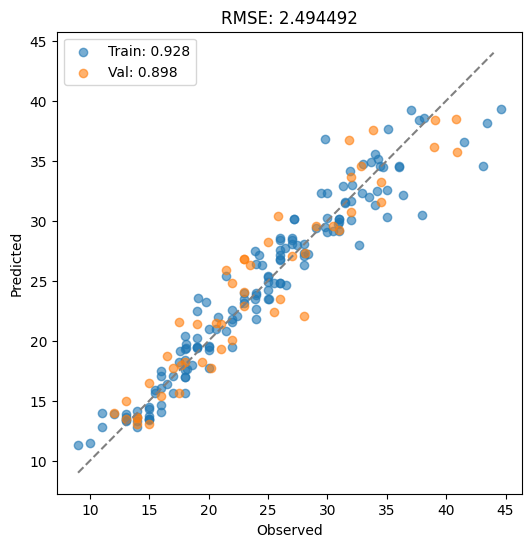

In [9]:
plt.figure(figsize=(6,6))
plt.title("RMSE: %.6f" %RMSE)
plt.scatter(y_train, y_pred_train, alpha=0.6, label="Train: %.3f" %r2_train)
plt.scatter(y_val, y_pred_val, alpha=0.6, label="Val: %.3f" %r2_val)
plt.plot(np.arange(min(y),max(y)),np.arange(min(y),max(y)), linestyle="dashed", color="gray")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()

In [10]:
path_test = "./try1/test_processed.csv"

X_test = load_data(path_test)
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,6,145.0,76.0,3160.0,19.6,81,2,27
1,6,250.0,98.0,3525.0,19.0,77,1,13
2,4,119.0,92.0,2434.0,15.0,80,3,9
3,6,258.0,110.0,2962.0,13.5,71,1,10
4,4,97.0,88.0,2100.0,16.5,72,3,3


In [11]:
y_pred_test = model.predict(X_test)
y_pred_test

array([26.34977922, 17.40394056, 33.20756654, 21.09331546, 25.48740453,
       25.48245403, 15.26966862, 20.66542963, 23.07741438, 22.43540705,
       13.42594719, 28.31679242, 13.47691165, 34.58250082, 31.72712255,
       14.5680901 , 24.78215557, 24.96782243, 11.97980749, 30.73162532,
       24.15140769, 38.3838728 , 15.68829286, 13.0213991 , 16.51078787,
       13.64346369, 12.34145485, 20.13770215, 30.30402897, 29.30786549,
       33.78224969, 19.02564085, 37.42534449, 13.42594719, 19.04368222,
       30.31392095, 34.18417669, 19.59859191, 28.26951891, 36.41829617,
       13.97443535, 28.69322678, 22.31775572, 29.6450856 , 22.20118857,
       38.78623872, 36.19414654, 20.50137411, 22.76096816, 25.49351517,
       25.1636396 , 25.70288676, 33.64253098, 17.58632983, 27.57306646,
       14.38239308, 13.30175409, 31.46818735, 13.30175409, 16.76585228,
       13.30175409, 25.40533552, 29.31215867, 14.78986154, 25.76690477,
       12.18880349, 37.64888041, 27.51559375, 18.69661855, 13.65

In [12]:
path_submit = "sample_submit.csv"

submit = pd.read_csv(path_submit, header=None)
submit

,0,1
0,1,19.8
1,2,31.3
2,4,31.9
3,5,20.0
4,6,16.5
...,...,...
194,391,35.0
195,392,31.0
196,393,16.0
197,394,23.9


In [13]:
df_y_pred_test = pd.DataFrame(y_pred_test)
df_y_pred_test

,0
0,26.349779
1,17.403941
2,33.207567
3,21.093315
4,25.487405
...,...
194,25.838993
195,28.641448
196,28.223061
197,15.661247


In [14]:
df_submit = pd.concat([submit.iloc[:,0], df_y_pred_test], axis=1)
df_submit.head()

,0,0
0,1,26.349779
1,2,17.403941
2,4,33.207567
3,5,21.093315
4,6,25.487405


In [15]:
df_submit.to_csv("./try2/try2_submit.csv", index=False)